In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

data = pd.read_csv('winequality-white.csv',sep=";")

label_encoder = LabelEncoder()
data['quality'] = label_encoder.fit_transform(data['quality'])

X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2]:

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(7, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0231 - loss: 1.9882 - val_accuracy: 0.0558 - val_loss: 1.9629
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0772 - loss: 1.9524 - val_accuracy: 0.1762 - val_loss: 1.9350
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2118 - loss: 1.9259 - val_accuracy: 0.3197 - val_loss: 1.9012
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3266 - loss: 1.8875 - val_accuracy: 0.4456 - val_loss: 1.8185
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4559 - loss: 1.7835 - val_accuracy: 0.4551 - val_loss: 1.6833
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4479 - loss: 1.6616 - val_accuracy: 0.4544 - val_loss: 1.5795
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4558 - loss: 1.5652 - val_accuracy: 0.4544 - val_loss: 1.5123
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4466 - loss: 1.5215 - val_accuracy: 0.4544 - val_loss: 1.4

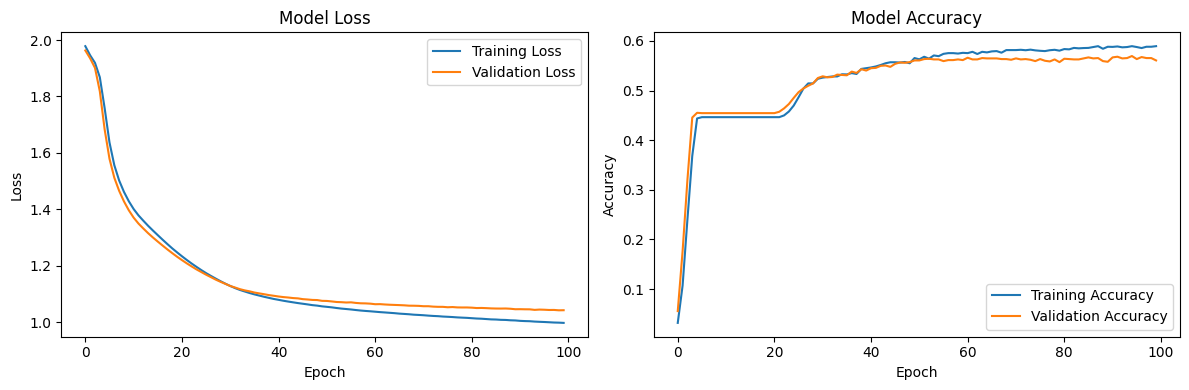

In [3]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = np.argmax(model.predict(X_test), axis=-1)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.30      0.17      0.22        40
           2       0.62      0.58      0.59       426
           3       0.56      0.69      0.62       668
           4       0.50      0.40      0.44       280
           5       0.00      0.00      0.00        49

    accuracy                           0.56      1470
   macro avg       0.33      0.31      0.31      1470
weighted avg       0.54      0.56      0.54      1470

Confusion Matrix:
 [[  0   0   3   4   0   0]
 [  0   7  18  15   0   0]
 [  0  13 245 157  11   0]
 [  0   3 126 460  79   0]
 [  0   0   6 162 112   0]
 [  0   0   0  25  24   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
from keras.layers import Input
from keras.models import Model

def build_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim)(encoded)
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

autoencoder1, encoder1 = build_autoencoder(X_train.shape[1], 64)
autoencoder1.fit(X_train, X_train, epochs=100, batch_size=64, shuffle=True)

X_train_encoded = encoder1.predict(X_train)
autoencoder2, encoder2 = build_autoencoder(64, 32)
autoencoder2.fit(X_train_encoded, X_train_encoded, epochs=100, batch_size=64, shuffle=True)

X_train_encoded = encoder2.predict(X_train_encoded)
autoencoder3, encoder3 = build_autoencoder(32, 16)
autoencoder3.fit(X_train_encoded, X_train_encoded, epochs=100, batch_size=64, shuffle=True)

X_train_encoded = encoder3.predict(X_train_encoded)
autoencoder4, encoder4 = build_autoencoder(16, 8)
autoencoder4.fit(X_train_encoded, X_train_encoded, epochs=100, batch_size=64, shuffle=True)

model.layers[0].set_weights(autoencoder1.get_weights()[:2])
model.layers[1].set_weights(autoencoder2.get_weights()[:2])
model.layers[2].set_weights(autoencoder3.get_weights()[:2])
model.layers[3].set_weights(autoencoder4.get_weights()[:2])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1662
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5104
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2273
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1098
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0542
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0368
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0274
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0236
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0202
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0177
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0165
Epoch 12/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0151
Epoch 13/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0143
Epoch 14/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0126
Epoch 15/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120
Epoc

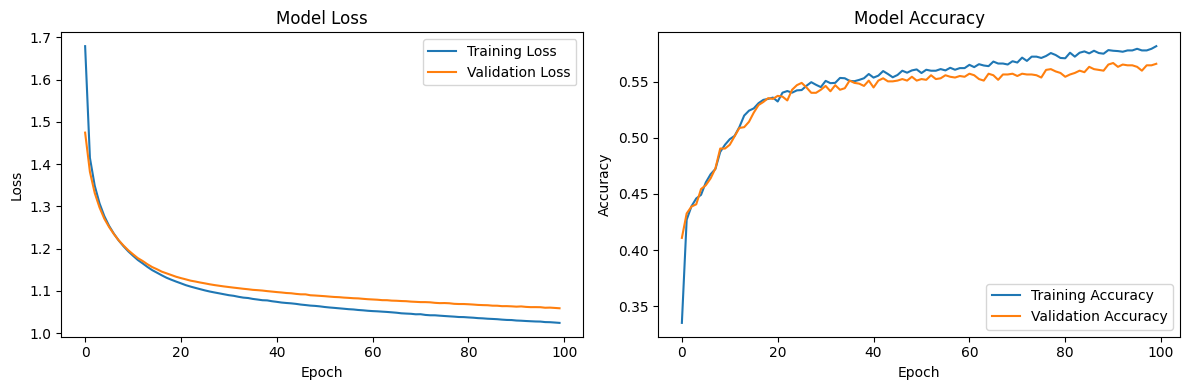

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
y_pred_pretrained = np.argmax(model.predict(X_test), axis=-1)

print("Classification Report (Pretrained):\n", classification_report(y_test, y_pred_pretrained))
print("Confusion Matrix (Pretrained):\n", confusion_matrix(y_test, y_pred_pretrained))

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report (Pretrained):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.40      0.05      0.09        40
           2       0.60      0.59      0.60       426
           3       0.56      0.72      0.63       668
           4       0.50      0.35      0.41       280
           5       0.00      0.00      0.00        49

    accuracy                           0.57      1470
   macro avg       0.34      0.28      0.29      1470
weighted avg       0.54      0.57      0.54      1470

Confusion Matrix (Pretrained):
 [[  0   0   4   3   0   0]
 [  0   2  23  15   0   0]
 [  0   3 252 163   8   0]
 [  0   0 124 481  63   0]
 [  0   0  15 168  97   0]
 [  0   0   1  23  25   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
